In [82]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import itertools
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from skbio.stats.composition import ilr
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.stats import chi2

from outliers import outlier_detection, logratio_outlier_detection, impute_zero_values
from plots import biplot, screeplot, loadingsplot, psuedocontrolcomparisonplot
from src.config import get_interim_dir

In [84]:
PSUEDOCOUNT = 0.5

In [85]:
alias = "MB03"
X_orig = pd.read_pickle(get_interim_dir() + "{}_gRNAwise_reduced_repair_outcome_profiles.pkl".format(alias))
counts = X_orig.sum(axis=1)
X_orig.head()

lumc_category                               Deletion 0bp microhomology  \
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       225.0   
                           0610009B22Rik-2                       343.0   
                           0610009B22Rik-3                       210.0   
                           0610009B22Rik-4                       344.0   
                           0610009B22Rik-5                       185.0   

lumc_category                               Deletion 1bp microhomology  \
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       562.0   
                           0610009B22Rik-2                       826.0   
                           0610009B22Rik-3                       892.0   
                           0610009B22Rik-4                      1045.0   
                           0610009B22Rik-5                       783.0   

lumc_category                               Deletion with insertion  \
Target Alias Gene          Barcode                                    
T2     MB03  0610009B22Rik 0610009B22Rik-1                    228.0   
                           0610009B22Rik-2                    575.0   
                           0610009B22Rik-3                    580.0   
                           0610009B22Rik-4                    711.0   
                           0610009B22Rik-5                    514.0   

lumc_category                               Homology Directed Repair  \
Target Alias Gene          Barcode                                     
T2     MB03  0610009B22Rik 0610009B22Rik-1                     554.0   
                           0610009B22Rik-2                     679.0   
                           0610009B22Rik-3                     705.0   
                           0610009B22Rik-4                     946.0   
                           0610009B22Rik-5                     559.0   

lumc_category                               Any Insertion  \
Target Alias Gene          Barcode                          
T2     MB03  0610009B22Rik 0610009B22Rik-1          222.0   
                           0610009B22Rik-2          350.0   
                           0610009B22Rik-3          331.0   
                           0610009B22Rik-4          454.0   
                           0610009B22Rik-5          259.0   

lumc_category                               Deletion 2+bp microhomology  
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       1137.0  
                           0610009B22Rik-2                       1466.0  
                           0610009B22Rik-3                       1526.0  
                           0610009B22Rik-4                       1875.0  
                           0610009B22Rik-5                       1294.0

In [86]:
X_orig.shape

(74235, 6)

In [87]:
# X = X_orig.groupby("Cluster", axis=1).sum()
X = X_orig.groupby("lumc_category", axis=1).sum()
X.head()

lumc_category                               Any Insertion  \
Target Alias Gene          Barcode                          
T2     MB03  0610009B22Rik 0610009B22Rik-1          222.0   
                           0610009B22Rik-2          350.0   
                           0610009B22Rik-3          331.0   
                           0610009B22Rik-4          454.0   
                           0610009B22Rik-5          259.0   

lumc_category                               Deletion 0bp microhomology  \
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       225.0   
                           0610009B22Rik-2                       343.0   
                           0610009B22Rik-3                       210.0   
                           0610009B22Rik-4                       344.0   
                           0610009B22Rik-5                       185.0   

lumc_category                               Deletion 1bp microhomology  \
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       562.0   
                           0610009B22Rik-2                       826.0   
                           0610009B22Rik-3                       892.0   
                           0610009B22Rik-4                      1045.0   
                           0610009B22Rik-5                       783.0   

lumc_category                               Deletion 2+bp microhomology  \
Target Alias Gene          Barcode                                        
T2     MB03  0610009B22Rik 0610009B22Rik-1                       1137.0   
                           0610009B22Rik-2                       1466.0   
                           0610009B22Rik-3                       1526.0   
                           0610009B22Rik-4                       1875.0   
                           0610009B22Rik-5                       1294.0   

lumc_category                               Deletion with insertion  \
Target Alias Gene          Barcode                                    
T2     MB03  0610009B22Rik 0610009B22Rik-1                    228.0   
                           0610009B22Rik-2                    575.0   
                           0610009B22Rik-3                    580.0   
                           0610009B22Rik-4                    711.0   
                           0610009B22Rik-5                    514.0   

lumc_category                               Homology Directed Repair  
Target Alias Gene          Barcode                                    
T2     MB03  0610009B22Rik 0610009B22Rik-1                     554.0  
                           0610009B22Rik-2                     679.0  
                           0610009B22Rik-3                     705.0  
                           0610009B22Rik-4                     946.0  
                           0610009B22Rik-5                     559.0

In [88]:
(X == 0).sum()

lumc_category
Any Insertion                  0
Deletion 0bp microhomology     0
Deletion 1bp microhomology     0
Deletion 2+bp microhomology    0
Deletion with insertion        0
Homology Directed Repair       0
dtype: int64

In [89]:
X_psuedo = impute_zero_values(X, 1)
X_psuedo

0.00 of our data is zero


lumc_category                               Any Insertion  \
Target Alias Gene          Barcode                          
T2     MB03  0610009B22Rik 0610009B22Rik-1          222.0   
                           0610009B22Rik-2          350.0   
                           0610009B22Rik-3          331.0   
                           0610009B22Rik-4          454.0   
                           0610009B22Rik-5          259.0   
...                                                   ...   
             ccdc198       ccdc198-4                210.0   
                           ccdc198-5                141.0   
             mei-04        Mei4-1                   254.0   
                           Mei4-2                   173.0   
                           Mei4-3                   451.0   

lumc_category                               Deletion 0bp microhomology  \
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       225.0   
                           0610009B22Rik-2                       343.0   
                           0610009B22Rik-3                       210.0   
                           0610009B22Rik-4                       344.0   
                           0610009B22Rik-5                       185.0   
...                                                                ...   
             ccdc198       ccdc198-4                             117.0   
                           ccdc198-5                             218.0   
             mei-04        Mei4-1                                205.0   
                           Mei4-2                                181.0   
                           Mei4-3                                285.0   

lumc_category                               Deletion 1bp microhomology  \
Target Alias Gene          Barcode                                       
T2     MB03  0610009B22Rik 0610009B22Rik-1                       562.0   
                           0610009B22Rik-2                       826.0   
                           0610009B22Rik-3                       892.0   
                           0610009B22Rik-4                      1045.0   
                           0610009B22Rik-5                       783.0   
...                                                                ...   
             ccdc198       ccdc198-4                             478.0   
                           ccdc198-5                             774.0   
             mei-04        Mei4-1                                728.0   
                           Mei4-2                                501.0   
                           Mei4-3                                775.0   

lumc_category                               Deletion 2+bp microhomology  \
Target Alias Gene          Barcode                                        
T2     MB03  0610009B22Rik 0610009B22Rik-1                       1137.0   
                           0610009B22Rik-2                       1466.0   
                           0610009B22Rik-3                       1526.0   
                           0610009B22Rik-4                       1875.0   
                           0610009B22Rik-5                       1294.0   
...                                                                 ...   
             ccdc198       ccdc198-4                              588.0   
                           ccdc198-5                             1357.0   
             mei-04        Mei4-1                                1382.0   
                           Mei4-2                                 870.0   
                           Mei4-3                                1896.0   

lumc_category                               Deletion with insertion  \
Target Alias Gene          Barcode                                    
T2     MB03  0610009B22Rik 0610009B22Rik-1                    228.0   
                           0610009B22Rik-2                    575.0   
                    

In [90]:
X = X.div(X.sum(axis=1), axis=0)
columns = X.columns
X = X.groupby(["Gene"]).mean()
X = pd.DataFrame(X.values.tolist(), index=X.index, columns=columns)

In [91]:
columns

Index(['Any Insertion', 'Deletion 0bp microhomology',
       'Deletion 1bp microhomology', 'Deletion 2+bp microhomology',
       'Deletion with insertion', 'Homology Directed Repair'],
      dtype='object', name='lumc_category')

In [92]:
X_psuedo = X_psuedo.div(X_psuedo.sum(axis=1), axis=0)
columns = X_psuedo.columns

In [93]:
X_psuedo_mean = X_psuedo.groupby(["Gene"]).mean()

In [94]:
X_psuedo_gmean = X_psuedo.groupby(["Gene"]).apply(stats.gmean)
X_psuedo_gmean = pd.DataFrame(X_psuedo_gmean.values.tolist(), index=X_psuedo_gmean.index, columns=columns)
X_psuedo_gmean = X_psuedo_gmean.div(X_psuedo_gmean.sum(axis=1), axis=0)

[0.28506772 0.4913826  0.67124527 0.84710794 1.         1.        ]


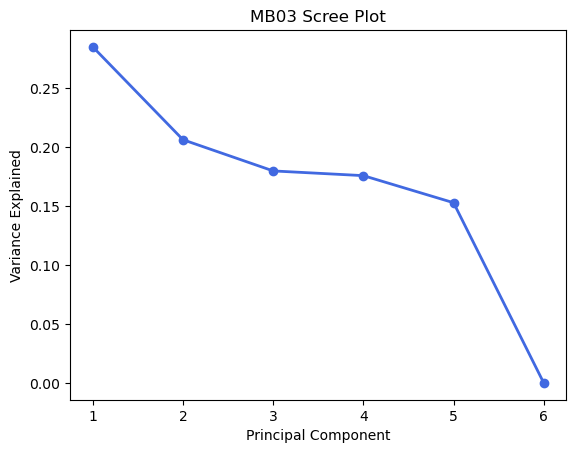

<Figure size 900x600 with 0 Axes>

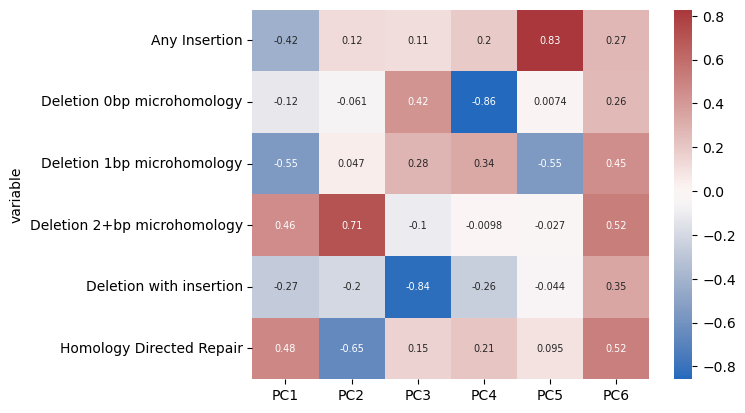

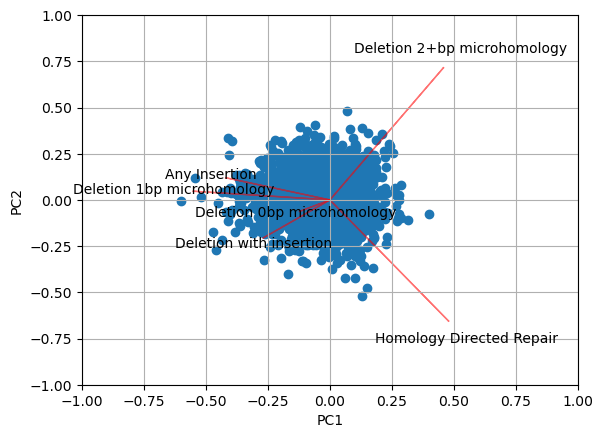

In [95]:
X_st = StandardScaler().fit_transform(X)
pca_scores, loadings, explained_variance_ratio, _, _ = outlier_detection(X_st, EmpiricalCovariance())

print(np.cumsum(explained_variance_ratio))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

plt.figure(figsize=(9, 6))
loadings_df, _ = loadingsplot(loadings, X.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0, 1]
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns)
plt.show()

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-41.792739533195885 > -41.965661553266514). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-41.641933264080293 > -42.917568844857811). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/covariance/_robust

[0.24634599 0.464891   0.65780717 0.84075963 1.         1.        ]


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-42.311334132815439 > -42.983022720419342). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(
/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-41.622358270941277 > -41.908680908755827). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(


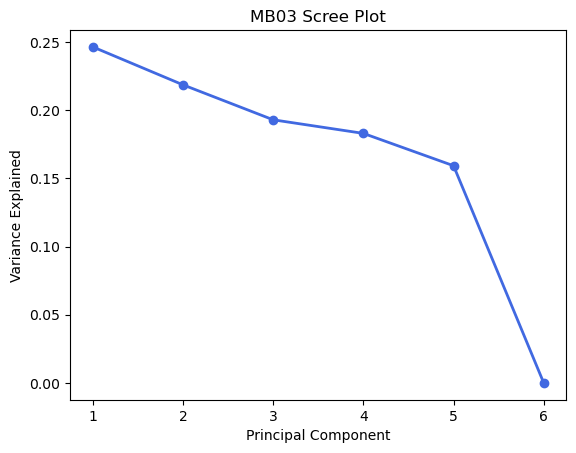

<Figure size 900x600 with 0 Axes>

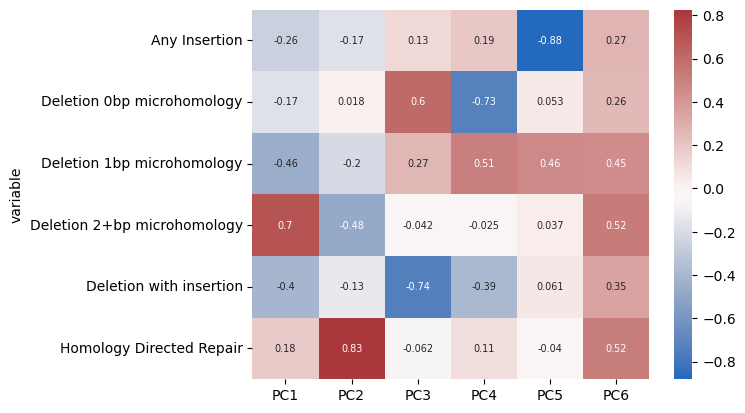

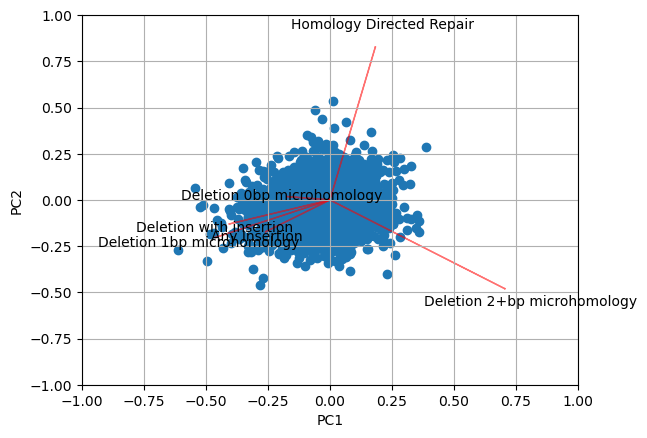

In [96]:
X_st = StandardScaler().fit_transform(X_psuedo_mean)
pca_scores, loadings, explained_variance_ratio, _, _ = outlier_detection(X_st, MinCovDet(random_state=0))

print(np.cumsum(explained_variance_ratio))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

plt.figure(figsize=(9, 6))
loadings_df, _ = loadingsplot(loadings, X.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0, 1]
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns)
plt.show()

[0.32773675 0.62635445 0.8046509  0.92158905 1.        ]


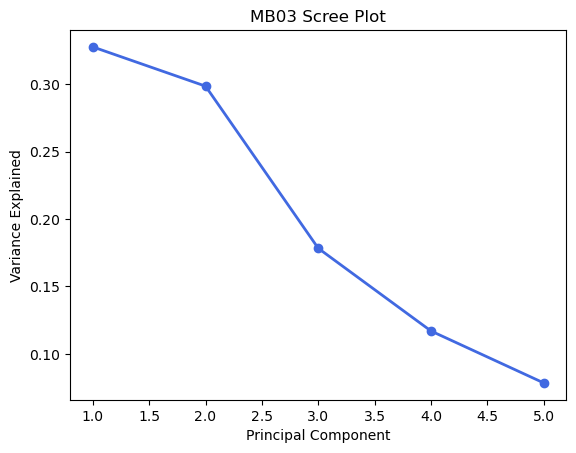

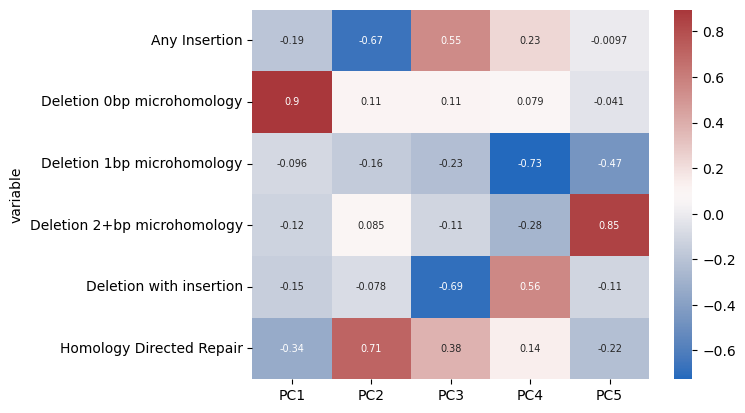

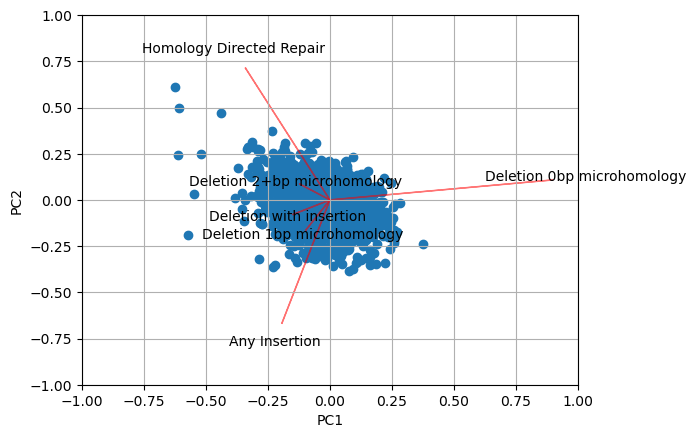

In [97]:
pca_scores, loadings, explained_variance_ratio, _, _ = logratio_outlier_detection(X_psuedo_gmean, EmpiricalCovariance())

print(np.cumsum(explained_variance_ratio))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

loadings_df, _ = loadingsplot(loadings, X_psuedo_gmean.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0,1]
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns)
plt.show()

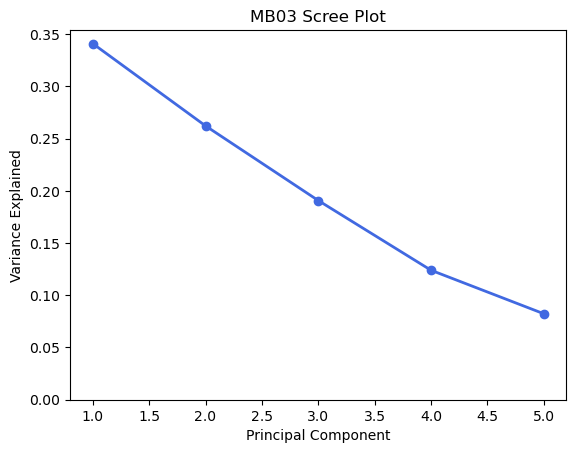

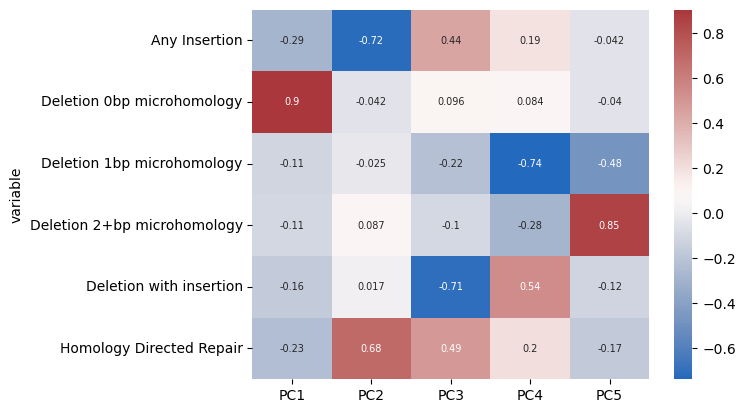

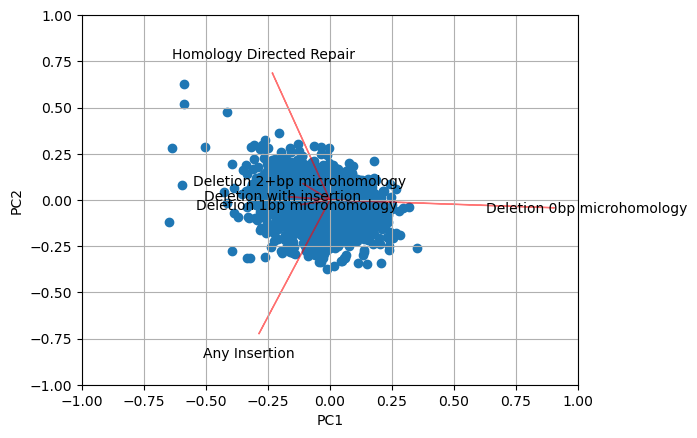

In [102]:
pca_scores, loadings, explained_variance_ratio, distances, pvalues = logratio_outlier_detection(X_psuedo_gmean, MinCovDet(random_state=0))

fig, ax = plt.subplots()
screeplot(explained_variance_ratio, ax, alias)
plt.show()

loadings_df, z = loadingsplot(loadings, X_psuedo_gmean.columns.to_list())
plt.show()

#Call the function. Use only the 2 PCs.
pcs_to_analyse = [0,1]
biplot(pca_scores[:,pcs_to_analyse], loadings_df.iloc[:,pcs_to_analyse].values, labels=loadings_df.index, components=loadings_df.iloc[:,pcs_to_analyse].columns)
plt.show()

In [99]:
results = pd.DataFrame({
    "pvalues": pvalues,
    "dist": distances
}, index=X_psuedo_gmean.index).sort_values(by="dist", ascending=False)
results.head(10)

,pvalues,dist
Gene,,
Ube2t,0.0,239.933579
Anapc10,0.0,208.874022
Sdad1,0.0,184.736564
Clca4c-ps,0.0,170.104243
Gtf3c6,0.0,164.814471
H2ax,0.0,157.749418
Slc25a5,0.0,148.431094
Krtap4-8,0.0,140.303277
Cd300ld4,0.0,138.189568


In [100]:
results.loc["Rrm1"]

pvalues    1.004608e-11
dist       5.743101e+01
Name: Rrm1, dtype: float64

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


Gene,Lig4,Orc4,Polq,Psg23,Rrm1,Sf3a3,Tdg,Ube2t
Feature,,,,,,,,
Deletion 2+bp microhomology,-0.275265,-0.208379,-0.407039,-0.023858,0.136131,-0.249279,-0.008592,0.011732
Deletion 1bp microhomology,0.069992,0.519143,0.399913,-0.083638,-0.214550,0.337109,0.008380,0.598032
Homology Directed Repair,0.228133,-0.812361,0.157178,0.101796,-0.761455,-0.054765,-0.146514,-1.665375
Deletion with insertion,0.259022,-0.051535,-0.366620,0.047804,0.251395,0.077676,-0.119042,0.295152
Any Insertion,0.340730,0.133684,0.203263,0.058803,0.471379,0.046122,-0.133522,0.240798
Deletion 0bp microhomology,-0.633633,0.537713,0.407119,-0.053935,0.181467,-0.020714,0.621896,-1.253900


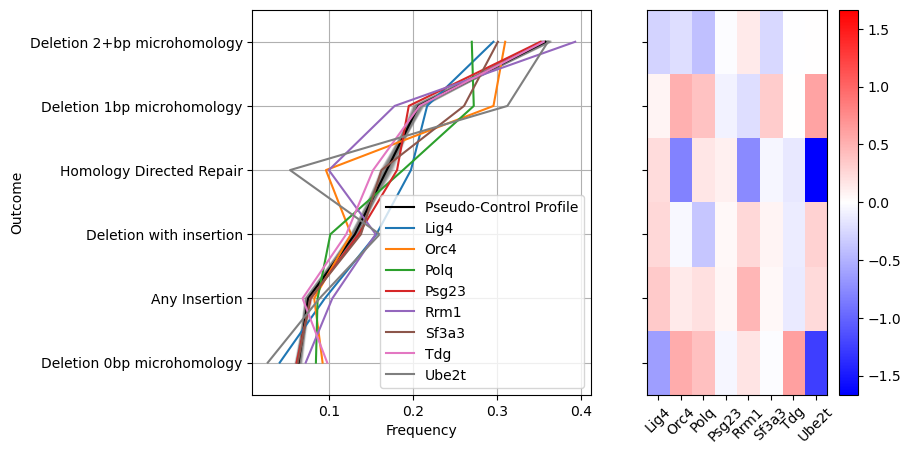

In [101]:
compare_genes = ["Orc4", "Polq", "Ube2t", "Psg23", "Lig4", "Sf3a3", "Tdg", "Rrm1"]
compare_genes = np.intersect1d(X.index.to_list(),compare_genes)
psuedocontrolcomparisonplot(results, X, compare_genes = compare_genes, num_outcomes=40)